# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head(10)

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524


## Rename all the columns to lower case

In [4]:
new_col = [col.lower() for col in df.columns]
new_col
df.columns = [col.lower() for col in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [33]:
df = df.set_index('linename').head()
df.head()

,level_0,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
linename,,,,,,,,,,,,,,
NQR456W,0,0,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,NaN,5
NQR456W,1,1,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,NaN,5
NQR456W,2,2,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,NaN,5
NQR456W,3,3,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,NaN,5
NQR456W,4,4,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,NaN,5


## Painstakingly change the index back

In [34]:
df = df.reset_index()
df.head()

,linename,level_0,index,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
0,NQR456W,0,0,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,NaN,5
1,NQR456W,1,1,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,NaN,5
2,NQR456W,2,2,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,NaN,5
3,NQR456W,3,3,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,NaN,5
4,NQR456W,4,4,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,NaN,5


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [35]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
#df.tail(10)# Your code here
#df.sort_values('Num_Lines').head()

## Write a function to clean a column name

In [36]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [37]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns]

In [38]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'level_0', 'index', 'c/a', 'unit', 'scp', 'station',
       'division', 'date', 'time', 'desc', 'entries', 'exits', 'Num_Lines',
       'Dayofweek'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [39]:
df.date = pd.to_datetime(df.date)#Your code here

In [31]:
df['Dayofweek'] = df.date.dt.dayofweek

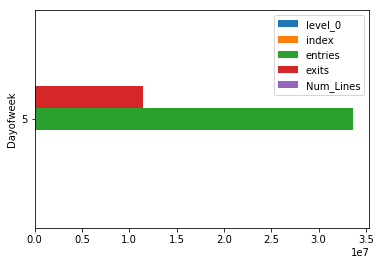

In [32]:
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.